# Commented out IPython magic to ensure Python compatibility.



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# %matplotlib inline

In [5]:
import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv("heart.csv")

type(dataset)

dataset.shape

dataset.head(5)

dataset.sample(5)

dataset.describe()

dataset.info()

info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

['.config', 'heart.csv', 'sample_data']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			

"""Analysing the 'target' variable"""

In [6]:

dataset["target"].describe()

dataset["target"].unique()

array([1, 0])

"""Clearly, this is a classification problem, with the target variable having values '0' and '1'
Checking correlation between columns
"""

In [7]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))


target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


# This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated


"""**Exploratory Data Analysis (EDA)**
First, analysing the target variable:
"""

target
1    165
0    138
Name: count, dtype: int64


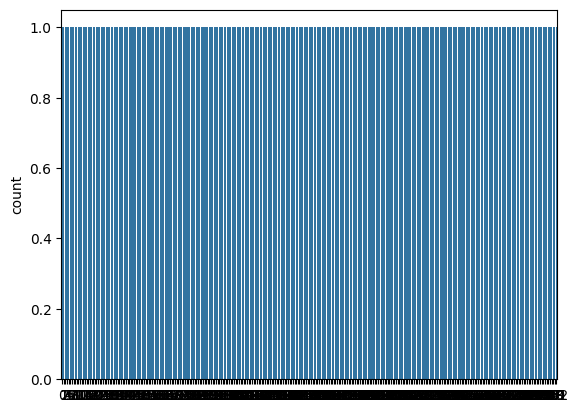

In [8]:
y = dataset["target"]

sns.countplot(y)
target_temp = dataset.target.value_counts()
print(target_temp)

"""We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features
Analysing the 'Sex' feature

"""

In [9]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


## Alternatively,
### print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
### print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

### Or, countNoDisease = len(df[df.target == 0]) countHaveDisease = len(df[df.target == 1])

We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features.

Analysing the 'Sex' feature

<Axes: ylabel='sex'>

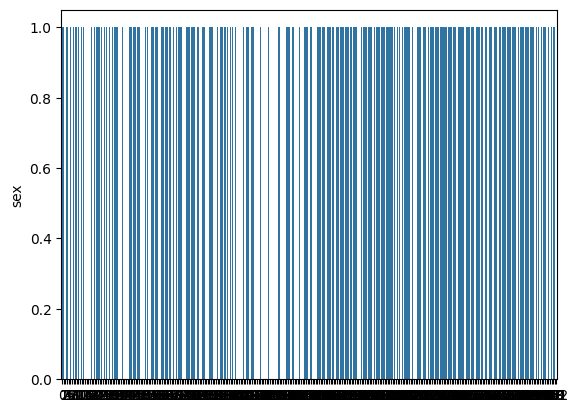

In [10]:

dataset["sex"].unique()

sns.barplot(dataset["sex"])

IV. Train Test split
```
# This is formatted as code
```


In [11]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target", axis=1)
target = dataset["target"]

X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

X_train.shape
X_test.shape
Y_train.shape
Y_test.shape

(61,)

"""V. Model Fitting"""


In [12]:
from sklearn.metrics import accuracy_score

"""Logistic Regression"""


In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

Y_pred_lr.shape

score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(Y_pred_lr,Y_test))

The accuracy score achieved using Logistic Regression is: 85.25 %
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.88      0.86      0.87        35

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



"""Naive Bayes"""


In [14]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

Y_pred_nb.shape

score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

print(classification_report(Y_pred_nb,Y_test))

The accuracy score achieved using Naive Bayes is: 85.25 %
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.91      0.84      0.87        37

    accuracy                           0.85        61
   macro avg       0.84      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



"""SVM"""

In [15]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

Y_pred_svm.shape

score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

print(classification_report(Y_pred_svm,Y_test))

The accuracy score achieved using Linear SVM is: 81.97 %
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.88      0.81      0.85        37

    accuracy                           0.82        61
   macro avg       0.81      0.82      0.81        61
weighted avg       0.83      0.82      0.82        61



K Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

Y_pred_knn.shape

score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

print(classification_report(Y_pred_knn,Y_test))

The accuracy score achieved using KNN is: 67.21 %
              precision    recall  f1-score   support

           0       0.67      0.62      0.64        29
           1       0.68      0.72      0.70        32

    accuracy                           0.67        61
   macro avg       0.67      0.67      0.67        61
weighted avg       0.67      0.67      0.67        61



Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

In [18]:
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

print(Y_pred_dt.shape)

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

print(classification_report(Y_pred_dt,Y_test))

(61,)
The accuracy score achieved using Decision Tree is: 81.97 %
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

In [26]:
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

Y_pred_rf.shape

score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

print(classification_report(Y_pred_rf,Y_test))

The accuracy score achieved using Decision Tree is: 90.16 %
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.94      0.89      0.91        36

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



XGBoost

In [27]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

Y_pred_xgb.shape

score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

print(classification_report(Y_pred_xgb,Y_test))

The accuracy score achieved using XGBoost is: 83.61 %
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



Neural Network

In [28]:
from keras.models import Sequential
from keras.layers import Dense

# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=300)

Y_pred_nn = model.predict(X_test)

Y_pred_nn.shape

rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

Epoch 1/300
8/8 [==============================] - 1s 6ms/step - loss: 10.7103 - accuracy: 0.4587
Epoch 2/300
8/8 [==============================] - 0s 6ms/step - loss: 5.2237 - accuracy: 0.4587
Epoch 3/300
8/8 [==============================] - 0s 5ms/step - loss: 1.1772 - accuracy: 0.6322
Epoch 4/300
8/8 [==============================] - 0s 6ms/step - loss: 1.4353 - accuracy: 0.6240
Epoch 5/300
8/8 [==============================] - 0s 5ms/step - loss: 1.1701 - accuracy: 0.6198
Epoch 6/300
8/8 [==============================] - 0s 4ms/step - loss: 0.8639 - accuracy: 0.6529
Epoch 7/300
8/8 [==============================] - 0s 4ms/step - loss: 0.8738 - accuracy: 0.6570
Epoch 8/300
8/8 [==============================] - 0s 4ms/step - loss: 0.7569 - accuracy: 0.6818
Epoch 9/300
8/8 [==============================] - 0s 4ms/step - loss: 0.7723 - accuracy: 0.6488
Epoch 10/300
8/8 [==============================] - 0s 5ms/step - loss: 0.7422 - accuracy: 0.6653
Epoch 11/300
8/8 [==========

# Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.


In [29]:
print(classification_report(Y_pred_nn,Y_test))


              precision    recall  f1-score   support

           0       0.78      0.81      0.79        26
           1       0.85      0.83      0.84        35

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



VI. Output final score

In [30]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Neural Network is: 81.97 %
